In [50]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# Add the following code that we used to generate the random latitudes. Also, we'll create a similar code snippet 
# that will generate longitudes. To ensure enough latitudes and longitudes, we'll start with 1,500. 
# In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) 
# with the zip() function.

# When we run this cell, the output is a zip object in memory.

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [52]:
# Next, let's unpack our lat_lngs zip object into a list. This way, we only need to create a set of random 
# latitudes and longitudes once. In a new cell in the WeatherPy.ipynb file, add the following code and run the cell.

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [53]:
# You can only unzip a zipped tuple once before it is removed from the computer's memory. 
# Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.
# Now that we have our ordered pairs of latitudes and longitudes in a list, we can iterate through the list 
# of tuples and find the nearest city to those coordinates.

In [54]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [55]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [56]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [57]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [58]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [59]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [60]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [61]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | sur
Processing Record 2 of Set 13 | aklavik
Processing Record 3 of Set 13 | guerrero negro
Processing Record 4 of Set 13 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 13 | punta arenas
Processing Record 6 of Set 13 | severo-kurilsk
Processing Record 7 of Set 13 | qaanaaq
Processing Record 8 of Set 13 | rikitea
Processing Record 9 of Set 13 | saskylakh
Processing Record 10 of Set 13 | were ilu
Processing Record 11 of Set 13 | ushuaia
Processing Record 12 of Set 13 | butaritari
Processing Record 13 of Set 13 | kodiak
Processing Record 14 of Set 13 | atuona
Processing Record 15 of Set 13 | port macquarie
Processing Record 16 of Set 13 | yellowknife
Processing Record 17 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 13 | goderich
Processing Record 19 of Set 13 | forbes
Processing Record 20 of Set 13 | marathon
Processing Record 21 of Set 13 | fare
Processing Record 22 of Set 13 | port alfred
Processing

Processing Record 34 of Set 16 | zyryanka
Processing Record 35 of Set 16 | harper
Processing Record 36 of Set 16 | vao
Processing Record 37 of Set 16 | deputatskiy
Processing Record 38 of Set 16 | bridlington
Processing Record 39 of Set 16 | tondano
Processing Record 40 of Set 16 | mayo
Processing Record 41 of Set 16 | ostrovnoy
Processing Record 42 of Set 16 | creston
Processing Record 43 of Set 16 | jiexiu
Processing Record 44 of Set 16 | mnogovershinnyy
Processing Record 45 of Set 16 | wahran
City not found. Skipping...
Processing Record 46 of Set 16 | nouadhibou
Processing Record 47 of Set 16 | bargal
City not found. Skipping...
Processing Record 48 of Set 16 | kuche
City not found. Skipping...
Processing Record 49 of Set 16 | mogadishu
Processing Record 50 of Set 16 | stanisic
Processing Record 1 of Set 17 | svetlyy
Processing Record 2 of Set 17 | kabalo
Processing Record 3 of Set 17 | flores
Processing Record 4 of Set 17 | hasaki
Processing Record 5 of Set 17 | torbay
Processing 

Processing Record 17 of Set 20 | half moon bay
Processing Record 18 of Set 20 | shediac
Processing Record 19 of Set 20 | ojinaga
Processing Record 20 of Set 20 | marawi
Processing Record 21 of Set 20 | talnakh
Processing Record 22 of Set 20 | manokwari
Processing Record 23 of Set 20 | mareeba
Processing Record 24 of Set 20 | noumea
Processing Record 25 of Set 20 | simao
Processing Record 26 of Set 20 | tanabe
Processing Record 27 of Set 20 | maghama
City not found. Skipping...
Processing Record 28 of Set 20 | gimli
Processing Record 29 of Set 20 | altona
Processing Record 30 of Set 20 | voh
Processing Record 31 of Set 20 | nisko
Processing Record 32 of Set 20 | veraval
Processing Record 33 of Set 20 | sibolga
Processing Record 34 of Set 20 | mitchell
Processing Record 35 of Set 20 | mount isa
Processing Record 36 of Set 20 | saint-pierre
Processing Record 37 of Set 20 | simbahan
Processing Record 38 of Set 20 | grindavik
Processing Record 39 of Set 20 | hambantota
Processing Record 40 

Processing Record 6 of Set 24 | yakeshi
Processing Record 7 of Set 24 | longlac
City not found. Skipping...
Processing Record 8 of Set 24 | pasinler
Processing Record 9 of Set 24 | orlik
Processing Record 10 of Set 24 | salalah
Processing Record 11 of Set 24 | meyungs
City not found. Skipping...
Processing Record 12 of Set 24 | freistadt
Processing Record 13 of Set 24 | paramonga
Processing Record 14 of Set 24 | san policarpo
Processing Record 15 of Set 24 | clyde river
Processing Record 16 of Set 24 | asau
Processing Record 17 of Set 24 | kurya
Processing Record 18 of Set 24 | virginia beach
Processing Record 19 of Set 24 | zaykovo
Processing Record 20 of Set 24 | hovd
Processing Record 21 of Set 24 | sebinkarahisar
Processing Record 22 of Set 24 | jarjis
City not found. Skipping...
Processing Record 23 of Set 24 | marzuq
Processing Record 24 of Set 24 | abnub
Processing Record 25 of Set 24 | cedar city
Processing Record 26 of Set 24 | iraucuba
Processing Record 27 of Set 24 | san qui

In [62]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sur,22.5667,59.5289,81.99,48,0,4.23,OM,2021-10-11 21:55:01
1,Aklavik,68.2191,-135.0107,29.23,78,96,10.74,CA,2021-10-11 21:55:02
2,Guerrero Negro,27.9769,-114.0611,73.94,60,0,15.64,MX,2021-10-11 21:55:03
3,Punta Arenas,-53.1500,-70.9167,53.71,50,40,26.46,CL,2021-10-11 21:55:04
4,Severo-Kurilsk,50.6789,156.1250,46.04,85,95,34.29,RU,2021-10-11 21:55:04
5,Qaanaaq,77.4840,-69.3632,30.54,97,100,8.30,GL,2021-10-11 21:55:05
6,Rikitea,-23.1203,-134.9692,74.23,77,90,13.24,PF,2021-10-11 21:55:06
7,Saskylakh,71.9167,114.0833,26.42,96,100,14.56,RU,2021-10-11 21:55:06
8,Were Ilu,10.6000,39.4333,52.07,85,83,5.64,ET,2021-10-11 21:55:07
9,Ushuaia,-54.8000,-68.3000,51.46,46,40,17.27,AR,2021-10-11 21:54:44


In [63]:
# reorder columns in the dataframe
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sur,OM,2021-10-11 21:55:01,22.5667,59.5289,81.99,48,0,4.23
1,Aklavik,CA,2021-10-11 21:55:02,68.2191,-135.0107,29.23,78,96,10.74
2,Guerrero Negro,MX,2021-10-11 21:55:03,27.9769,-114.0611,73.94,60,0,15.64
3,Punta Arenas,CL,2021-10-11 21:55:04,-53.1500,-70.9167,53.71,50,40,26.46
4,Severo-Kurilsk,RU,2021-10-11 21:55:04,50.6789,156.1250,46.04,85,95,34.29
5,Qaanaaq,GL,2021-10-11 21:55:05,77.4840,-69.3632,30.54,97,100,8.30
6,Rikitea,PF,2021-10-11 21:55:06,-23.1203,-134.9692,74.23,77,90,13.24
7,Saskylakh,RU,2021-10-11 21:55:06,71.9167,114.0833,26.42,96,100,14.56
8,Were Ilu,ET,2021-10-11 21:55:07,10.6000,39.4333,52.07,85,83,5.64
9,Ushuaia,AR,2021-10-11 21:54:44,-54.8000,-68.3000,51.46,46,40,17.27


In [64]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [65]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

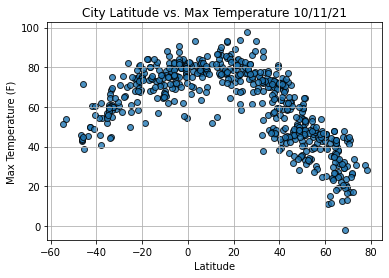

In [66]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

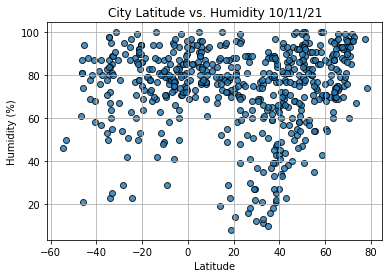

In [67]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

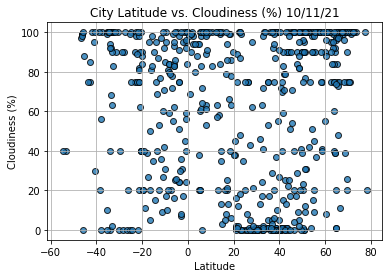

In [68]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

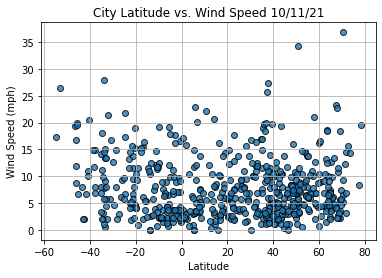

In [69]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [70]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [71]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sur,OM,2021-10-11 21:55:01,22.5667,59.5289,81.99,48,0,4.23
1,Aklavik,CA,2021-10-11 21:55:02,68.2191,-135.0107,29.23,78,96,10.74
2,Guerrero Negro,MX,2021-10-11 21:55:03,27.9769,-114.0611,73.94,60,0,15.64
4,Severo-Kurilsk,RU,2021-10-11 21:55:04,50.6789,156.1250,46.04,85,95,34.29
5,Qaanaaq,GL,2021-10-11 21:55:05,77.4840,-69.3632,30.54,97,100,8.30
...,...,...,...,...,...,...,...,...,...
560,Yuzhnyy-Kospashskiy,RU,2021-10-11 21:59:42,58.9695,57.7548,46.96,100,100,6.96
561,Cervo,ES,2021-10-11 21:59:42,43.6702,-7.4101,61.97,84,22,19.33
562,Mackenzie,CA,2021-10-11 21:57:09,55.2999,-123.1698,39.42,75,20,13.80
563,Muravlenko,RU,2021-10-11 21:59:43,63.7898,74.5230,26.74,72,60,6.55


In [72]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sur,OM,2021-10-11 21:55:01,22.5667,59.5289,81.99,48,0,4.23
1,Aklavik,CA,2021-10-11 21:55:02,68.2191,-135.0107,29.23,78,96,10.74
2,Guerrero Negro,MX,2021-10-11 21:55:03,27.9769,-114.0611,73.94,60,0,15.64
4,Severo-Kurilsk,RU,2021-10-11 21:55:04,50.6789,156.1250,46.04,85,95,34.29
5,Qaanaaq,GL,2021-10-11 21:55:05,77.4840,-69.3632,30.54,97,100,8.30


In [73]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

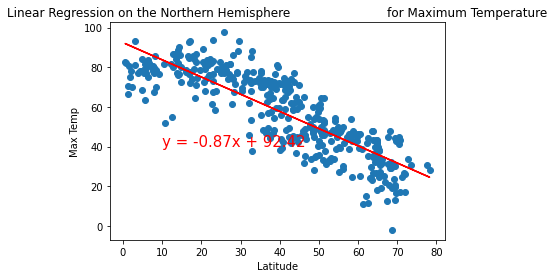

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

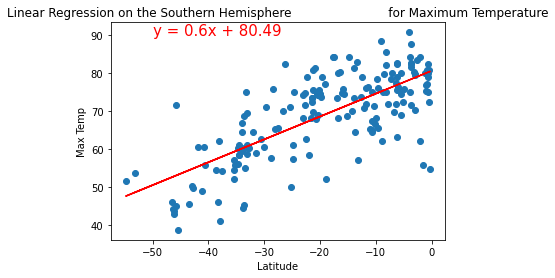

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

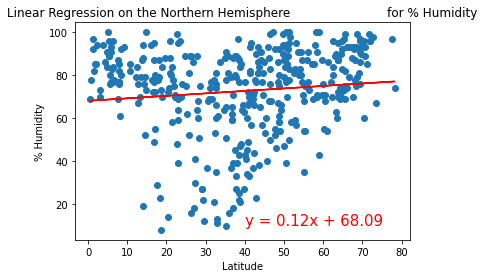

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

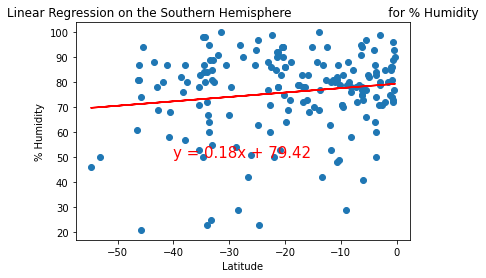

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-40,50))

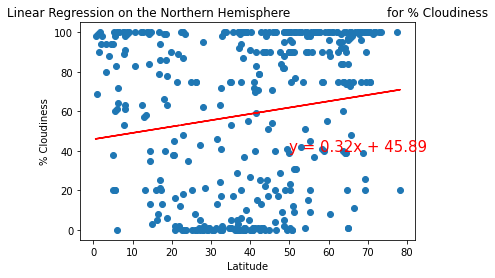

In [80]:
# Skill drill create the x- and y-values for the percent cloudiness and latitudes on the Northern Hemisphere DataFrame
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(50, 40))

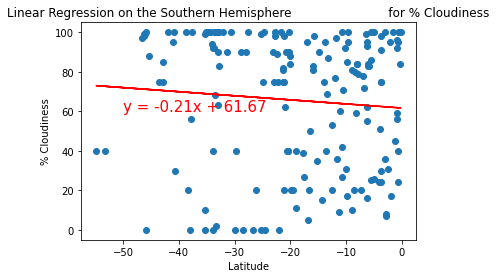

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

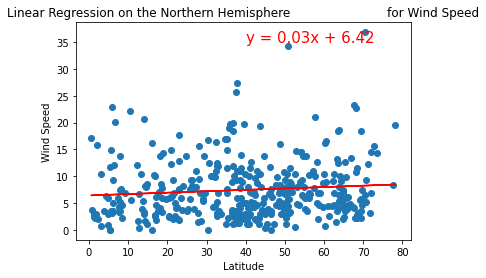

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))